In [1]:
# import pandas as pd
# weather = pd.read_csv('../data/weather_2012.csv',parse_dates=True)
# weather.head(5)
# type(weather['date_time'][1])
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 3)
plt.rcParams["font.family"] = "sans-serif"

In [3]:
import polars as pl
pl_weather_2012 = pl.read_csv(
    "../data/weather_2012.csv",try_parse_dates=True)
pl_weather_2012[:5]

date_time,longitude,latitude,station_name,climate_id,temperature_c,dew_point_temp_c,relative_humidity,wind_speed_kmh,visibility_km,station_pressure_kpa,weather
datetime[μs],f64,f64,str,i64,f64,f64,i64,i64,f64,f64,str
2012-01-01 00:00:00,-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEA…",7025250,-1.8,-3.9,86,4,8.0,101.24,"""Fog"""
2012-01-01 01:00:00,-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEA…",7025250,-1.8,-3.7,87,4,8.0,101.24,"""Fog"""
2012-01-01 02:00:00,-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEA…",7025250,-1.8,-3.4,89,7,4.0,101.26,"""Freezing Drizzle,Fog"""
2012-01-01 03:00:00,-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEA…",7025250,-1.5,-3.2,88,6,4.0,101.27,"""Freezing Drizzle,Fog"""
2012-01-01 04:00:00,-73.75,45.47,"""MONTREAL/PIERRE ELLIOTT TRUDEA…",7025250,-1.5,-3.3,88,7,4.8,101.23,"""Fog"""


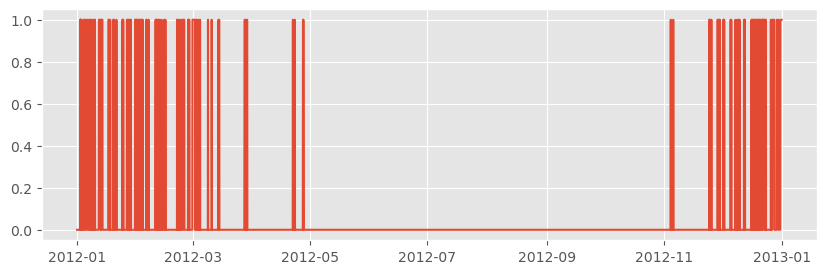

In [4]:
weather_description = pl_weather_2012['weather']
is_snowing = weather_description.str.contains("Snow")
is_snowing = is_snowing.cast(pl.Float64)
plt.plot(pl_weather_2012['date_time'],is_snowing)

<BarContainer object of 12 artists>

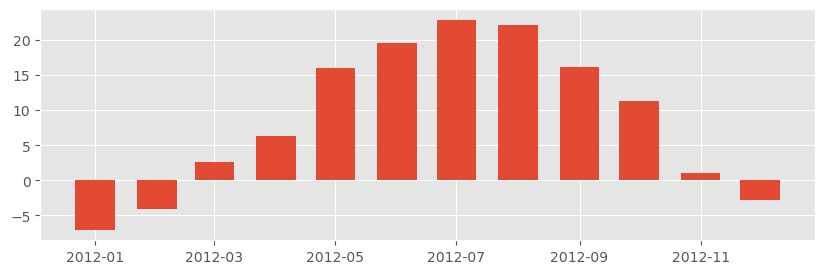

In [6]:
monthly_median_temp = pl_weather_2012.group_by_dynamic('date_time',every='1mo').agg(pl.col("temperature_c").median())
plt.bar(monthly_median_temp['date_time'],monthly_median_temp['temperature_c'],width=20)

<BarContainer object of 12 artists>

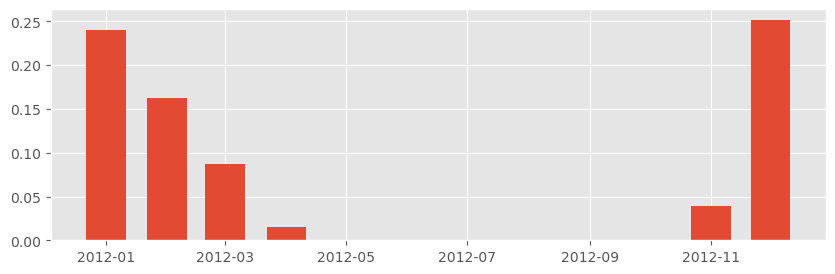

In [12]:
new_df = pl.DataFrame({
    "date_time": pl_weather_2012["date_time"],
    "is_snowing": is_snowing
})


monthly_mean_is_snowing = new_df.group_by_dynamic('date_time',every='1mo').agg(pl.col("is_snowing").mean())
plt.bar(monthly_mean_is_snowing['date_time'],monthly_mean_is_snowing['is_snowing'],width=20)